In [108]:
import pandas as pd

ds1_cnfs = pd.read_csv(f"cnfs/ds1.csv", index_col="instance")
ds2_cnfs = pd.read_csv(f"cnfs/ds2.csv", index_col="instance")
ds_stat = pd.read_csv("results/ds_random_cnfs.csv", index_col=["dataset", "instance", "model", "method"])

means = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.mean())
mins = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.min())
maxs = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.max())

In [109]:
import matplotlib.pyplot as plt 
import matplotlib 
plt.rcParams.update({ 
    "text.usetex": True,  
    "font.size": 12,
    "figure.figsize": (11, 2.5) ,
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'pgf.rcfonts': False
})

use_pgf = True 
if use_pgf: matplotlib.use("pgf")
else: matplotlib.use("module://matplotlib_inline.backend_inline")

def make_comp_fig():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_ylabel("Time [ms]")
    ax1.set_yscale("log")
    ax2.set_yscale("log")
    ax1.set_xlabel("Number of variables")
    ax2.set_xlabel("Number of variables")
    ax1.grid(True)
    ax2.grid(True)
    return fig, (ax1, ax2)

fmt_ctr = 0
def iter_fmt():
    global fmt_ctr
    fmts = ["o", "x", "1", "s", "+", "p"]
    lines = ["--","-", "-.", ":"]
    fmt = fmts[fmt_ctr%len(fmts)] + lines[fmt_ctr%len(lines)]
    fmt_ctr += 1
    return fmt

def plot(axs, means, maxs, mins, model, method, label, with_error=False, int_ticks=True, parsing=False):
    fmt = iter_fmt()
    for ds, ax in zip(["ds1", "ds2"], axs):
        if ax is None: continue
        instances = means.loc[(ds, model, method), "n"]
        # plt.xticks(instances)
        if int_ticks: instances = list(map(lambda it: f"${int(it)}$", instances.index))
        times_mean = means.loc[(ds, model, method), "ot"]
        times_mins = mins.loc[(ds, model, method), "ot"]
        times_maxs = maxs.loc[(ds, model, method), "ot"]
        if parsing:
            times_mean = times_mean - means.loc[(ds, model, method), "mt"]
            times_mins = times_mins - mins.loc[(ds, model, method), "mt"]
            times_maxs = times_maxs - maxs.loc[(ds, model, method), "mt"]

        if with_error:
            ax.errorbar(
                instances,
                times_mean, 
                yerr=[times_mean-times_mins, times_maxs-times_mean], 
                fmt=fmt, label=label, barsabove=True)
        else:
            ax.errorbar(
                instances, 
                times_mean, 
                fmt=fmt, label=label)

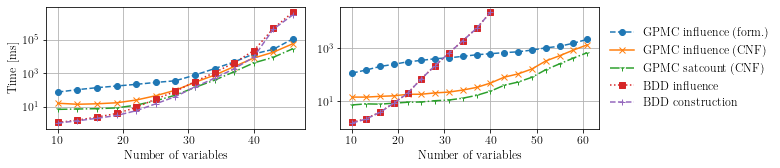

In [110]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "GPMC", "influence", label="GPMC influence (form.)", int_ticks=False)
plot(axs, means, maxs, mins, "GPMC", "raw_influence", label="GPMC influence (CNF)", int_ticks=False)
plot(axs, means, maxs, mins, "GPMC", "raw_satcount", label="GPMC satcount (CNF)", int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "tseitin", label="GPMC/tseitin")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "blame", label="GPMC: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "mblame", label="GPMC: Modified Blame")
plot(axs, means, maxs, mins, "BDD", "influence", label="BDD influence", int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", label="BuDDy: Satcount")
plot(axs, means, maxs, mins, "BDD", "influence", label="BDD construction", parsing=True, int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", label="BuDDy: Satcount")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "blame", label="BuDDy: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "mblame", label="BuDDy: Modified Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "dominating_cgm", label="BuDDy: Dominating CGM")
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/influence_ot.pgf")
else: plt.show()

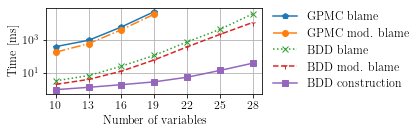

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.set_ylabel("Time [ms]")
ax.set_yscale("log")
ax.set_xlabel("Number of variables")
ax.grid(True)
axs = (ax, None)

plot(axs, means, maxs, mins, "GPMC", "blame", label="GPMC blame")
plot(axs, means, maxs, mins, "GPMC", "mblame", label="GPMC mod. blame")
# plot(axs, means, maxs, mins, "GPMC", "satcount", label="GPMC: Satcount")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD blame")
plot(axs, means, maxs, mins, "BDD", "mblame", label="BDD mod. blame")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD construction", parsing=True)
# plot(axs, means, maxs, mins, "BDD", "satcount", label="BDD: Satcount")
ax.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/blame_single.pgf")
else: plt.show()

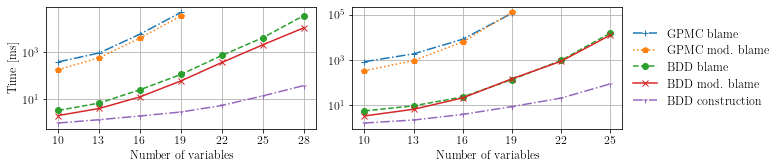

In [112]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "GPMC", "blame", label="GPMC blame")
plot(axs, means, maxs, mins, "GPMC", "mblame", label="GPMC mod. blame")
# plot(axs, means, maxs, mins, "GPMC", "satcount", label="GPMC: Satcount")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD blame")
plot(axs, means, maxs, mins, "BDD", "mblame", label="BDD mod. blame")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD construction", parsing=True)
# plot(axs, means, maxs, mins, "BDD", "satcount", label="BDD: Satcount")
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/blame_ot.pgf")
else: plt.show()

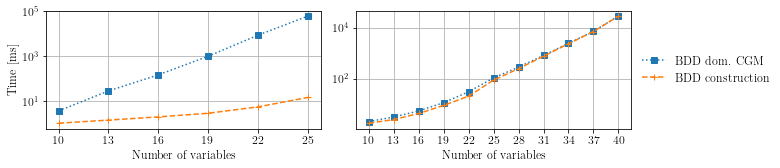

In [113]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "BDD", "dominating_cgm", label="BDD dom. CGM", int_ticks=True)
plot(axs, means, maxs, mins, "BDD", "dominating_cgm", label="BDD construction", int_ticks=True, parsing=True)
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/dominating_cgm_ot.pgf")
else: plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


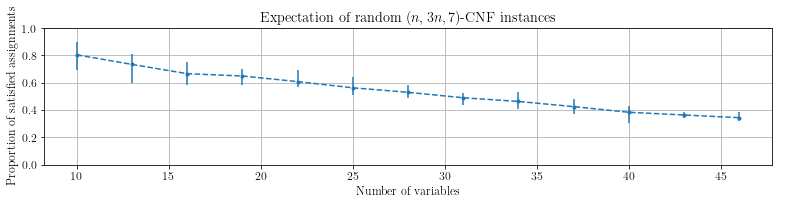

In [114]:
# Expected values
ds = ds1_cnfs # ds2 too low expectations

means = ds[["n","expectation"]].groupby("n").apply(lambda group: group.mean())
mins = ds[["n","expectation"]].groupby("n").apply(lambda group: group.min())
maxs = ds[["n","expectation"]].groupby("n").apply(lambda group: group.max())
ys, yslow, yshigh = means["expectation"], mins["expectation"], maxs["expectation"]
plt.errorbar(
    means["n"], 
    ys, yerr=[ ys - yslow, yshigh - ys ], 
    fmt=".--")

plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
plt.grid(True)
plt.tight_layout()
plt.ylim((0,1))
plt.xlabel("Number of variables")
plt.ylabel("Proportion of satisfied assignments")
plt.title("Expectation of random $(n, 3n, 7)$-CNF instances")
plt.yscale("linear")

if use_pgf: plt.savefig("pics/expected_value_ot_ds1.pgf")
else: plt.show()

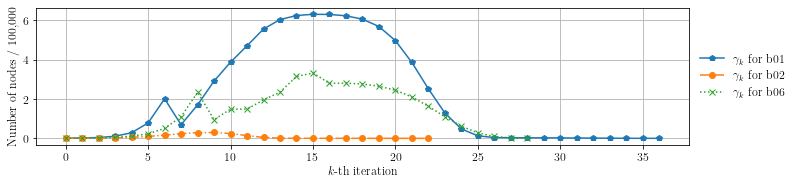

In [115]:
# BDD sizes
df_sizes = pd.read_csv("results/blame_bdd_sizes.csv", index_col=["instance", "k"])
for b in ["b01", "b02", "b06"]:
    # index = [f"${int(idx)}$" for idx in df_sizes.loc[b].index]
    index = df_sizes.loc[b].index 
    plt.plot(index, df_sizes.loc[b]["BDD_size"] / 100000, iter_fmt(), label=f"$\gamma_k$ for {b}")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
plt.grid(True)
plt.tight_layout()
plt.xlabel("$k$-th iteration")
plt.ylabel("Number of nodes / 100,000")
plt.yscale("linear")
# plt.title("BDD nodes vs. progress of blame computation")
if use_pgf: plt.savefig("pics/bdd_nodes_blame.pgf")
else: plt.show()

In [116]:
# ISCAS'99
import pandas as pd

rpath = "./results/ds_iscas99.csv"
fdir = "./cnfs/iscas99"
fnames = [ f"b{str(idx+1).zfill(2)}.bench.dimacs" for idx in range(13) ]
fpaths = [ f"{fdir}/{fname}" for fname in fnames ]

df = pd.read_csv(rpath, index_col="benchmark")
means = df.groupby(["benchmark", "method"])["time"].apply(lambda g: g.mean()).to_frame()
stds = df.groupby(["benchmark", "method"])["time"].apply(lambda g: g.std()).to_frame()
means = means.unstack()
stds = stds.unstack()

def large_number_notation(val):
    if val > 1_000:
        left, right = val // 1000, val % 1000
        right = str(right).zfill(3)
        val = f"{left}'{right}"
    return val

def niceformat_mean(val):
    if str(val)=="nan":
        return "\\timeout"
    val = int(val * 1000)
    if val < 1:
        return f"$<$1"
    val = large_number_notation(val)
    return f"{val}"

def niceformat_std(val):
    if str(val)=="nan":
        return ""
    val = int(val*1000)
    if val < 1:
        return "\,ms"
    val = large_number_notation(val)
    return f"$\pm${val}\,ms"

combs = means.applymap(niceformat_mean).add(stds.applymap(niceformat_std))

for fpath in fpaths:
    fname = fpath.split("/")[-1]
    lines = open(fpath).read().split("\n")
    for l in lines:
        if l.strip().startswith("p"):
            nvars, nclauses = l.split()[2:]
            combs.loc[fname, "nvars"] = int(nvars)
            combs.loc[fname, "nclauses"] = int(nclauses)
            break

combs = combs.sort_values("nvars")
combs["nvars"] = combs["nvars"].apply(lambda it: str(int(it)))
combs["nclauses"] = combs["nclauses"].apply(lambda it: str(int(it)))
# combs.columns.set_levels([
combs.columns = ["_".join(col) for col in combs.columns.values]
combs["time_GPMC_blame"]="\\timeout"
combs = combs[[
    "nvars_", 
    "nclauses_", 
    # "time_GPMC_satcount",
    "time_GPMC_raw_influence",
    "time_GPMC_influence",
    "time_GPMC_blame",
    # "time_GPMC_parsing",
    "time_BDD_parsing",
    # "time_BDD_initial_order",
    # "time_BDD_expectation",
    "time_BDD_influence",
    "time_BDD_dcgm",
    "time_BDD_blame"]]
combs 

,nvars_,nclauses_,time_GPMC_raw_influence,time_GPMC_influence,time_GPMC_blame,time_BDD_parsing,time_BDD_influence,time_BDD_dcgm,time_BDD_blame
benchmark,,,,,,,,,
b02.bench.dimacs,26,66,"5\,ms","49$\pm$1\,ms",\timeout,"1\,ms","$<$1\,ms","2\,ms",3'649
b06.bench.dimacs,44,122,"7$\pm$1\,ms","99$\pm$39\,ms",\timeout,"3\,ms","$<$1\,ms","6\,ms",697'573
b01.bench.dimacs,45,120,"7\,ms","110$\pm$47\,ms",\timeout,"4\,ms","$<$1\,ms","8\,ms",3068'667
b03.bench.dimacs,156,376,"11\,ms","442$\pm$47\,ms",\timeout,"53'934$\pm$1'560\,ms","24$\pm$1\,ms","1'776$\pm$84\,ms",\timeout
b09.bench.dimacs,169,417,"22$\pm$1\,ms","483$\pm$81\,ms",\timeout,"23'373$\pm$553\,ms","13$\pm$1\,ms","1'137$\pm$58\,ms",\timeout
b08.bench.dimacs,180,455,"26$\pm$1\,ms","577$\pm$60\,ms",\timeout,"11'703$\pm$370\,ms","18\,ms","1'729$\pm$85\,ms",\timeout
b10.bench.dimacs,201,525,"27\,ms","658$\pm$69\,ms",\timeout,"19'079$\pm$557\,ms","44$\pm$2\,ms","3'221$\pm$111\,ms",\timeout
b13.bench.dimacs,352,847,"34$\pm$1\,ms","1'088$\pm$128\,ms",\timeout,\timeout,\timeout,\timeout,\timeout
b07.bench.dimacs,435,1132,"64$\pm$22\,ms","2'058$\pm$89\,ms",\timeout,\timeout,\timeout,\timeout,\timeout


In [117]:
# table to latex
for idx in combs.index:
    r = combs.loc[idx]
    idx_name = idx.split(".")[0]
    print(idx_name + " & " + " & ".join(r) + " \\\\")

b02 & 26 & 66 & 5\,ms & 49$\pm$1\,ms & \timeout & 1\,ms & $<$1\,ms & 2\,ms & 3'649 \\
b06 & 44 & 122 & 7$\pm$1\,ms & 99$\pm$39\,ms & \timeout & 3\,ms & $<$1\,ms & 6\,ms & 697'573 \\
b01 & 45 & 120 & 7\,ms & 110$\pm$47\,ms & \timeout & 4\,ms & $<$1\,ms & 8\,ms & 3068'667 \\
b03 & 156 & 376 & 11\,ms & 442$\pm$47\,ms & \timeout & 53'934$\pm$1'560\,ms & 24$\pm$1\,ms & 1'776$\pm$84\,ms & \timeout \\
b09 & 169 & 417 & 22$\pm$1\,ms & 483$\pm$81\,ms & \timeout & 23'373$\pm$553\,ms & 13$\pm$1\,ms & 1'137$\pm$58\,ms & \timeout \\
b08 & 180 & 455 & 26$\pm$1\,ms & 577$\pm$60\,ms & \timeout & 11'703$\pm$370\,ms & 18\,ms & 1'729$\pm$85\,ms & \timeout \\
b10 & 201 & 525 & 27\,ms & 658$\pm$69\,ms & \timeout & 19'079$\pm$557\,ms & 44$\pm$2\,ms & 3'221$\pm$111\,ms & \timeout \\
b13 & 352 & 847 & 34$\pm$1\,ms & 1'088$\pm$128\,ms & \timeout & \timeout & \timeout & \timeout & \timeout \\
b07 & 435 & 1132 & 64$\pm$22\,ms & 2'058$\pm$89\,ms & \timeout & \timeout & \timeout & \timeout & \timeout \\
b04 & 730 